As bibliotecas necessárias são importadas. A biblioteca Numpy para manipulação numérica das matrizes, a biblioteca Pandas para criar os dataframes, a biblioteca para separar a matriz de teste e aprendizagem train_test_split, os modelos de algoritmo de classificação pedidos no exercício: Regressão Logística, Arvore de Decisão, RandomForest, KNeighbors, Gradient Boosting, uma biblioteca para pré-processamento do dataset (StandardScaler) e a biblioteca para medir a qualidade preditiva dos modelos (accuracy_score, confusion_matrix e classification_report)

In [15]:
# Importar as bibliotecas
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

Fazer a carga do dataset a partir do arquivo credtrain.txt, passando o nome das colunas. Verificar se o dataset foi carregado corretamente e analisar o conteúdo do dataset

In [11]:
# Define o nomes das colunas
nomes_colunas = ['ESCT', 'NDEP', 'RENDA', 'TIPOR', 'VBEM', 'NPARC', 'VPARC', 'TEL', 'IDADE', 'RESMS', 'ENTRADA', 'CLASSE']

# Carrega o dataset
dataset = pd.read_csv('../data/credtrain.txt', names=nomes_colunas, sep='\t', header=0)

In [12]:
dataset.head()
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   ESCT     1499 non-null   int64
 1   NDEP     1499 non-null   int64
 2   RENDA    1499 non-null   int64
 3   TIPOR    1499 non-null   int64
 4   VBEM     1499 non-null   int64
 5   NPARC    1499 non-null   int64
 6   VPARC    1499 non-null   int64
 7   TEL      1499 non-null   int64
 8   IDADE    1499 non-null   int64
 9   RESMS    1499 non-null   int64
 10  ENTRADA  1499 non-null   int64
 11  CLASSE   1499 non-null   int64
dtypes: int64(12)
memory usage: 140.7 KB


,ESCT,NDEP,RENDA,TIPOR,VBEM,NPARC,VPARC,TEL,IDADE,RESMS,ENTRADA,CLASSE
count,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000
mean,0.511674,0.126751,984.928619,0.445630,562.197465,8.392262,102.280854,0.134089,41.221481,31.517678,32.276851,0.476318
std,0.660009,0.573047,905.691299,0.497201,265.701366,3.610302,62.994960,0.340862,13.200024,52.677954,94.335403,0.499606
min,0.000000,0.000000,300.000000,0.000000,300.000000,1.000000,50.000000,0.000000,19.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,468.500000,0.000000,410.000000,6.000000,66.000000,0.000000,31.000000,6.000000,0.000000,0.000000
50%,0.000000,0.000000,650.000000,0.000000,490.000000,10.000000,83.000000,0.000000,39.000000,6.000000,0.000000,0.000000
75%,1.000000,0.000000,1200.000000,1.000000,618.000000,10.000000,118.000000,0.000000,52.000000,48.000000,0.000000,1.000000
max,3.000000,7.000000,8000.000000,1.000000,4000.000000,24.000000,711.000000,1.000000,70.000000,420.000000,1300.000000,1.000000


No dataset apresentado é identificado alguns atributos categóricos, ainda que estejam representados numericamente, como: Estado Civil (ESCT), Tipo de residência (TIPOR) e se o cliente possui telefone (TEL). Nesses casos será aplicado a técnica de One-hot-encoding, que transpõe os domínios encontrados nestes atributos em campos nomeados destes valores. O campo de número de dependentes (NDEP), apesar de categório, apresenta-se de forma númerica e ordenada, característica coerente com a natureza deste atributo, sendo assim, não será necessário aplicar a técnica de One-hot-encoding em NDEP.

In [13]:
dataset = pd.get_dummies(dataset, columns=['ESCT','TIPOR','TEL'])

dataset.head()

,NDEP,RENDA,VBEM,NPARC,VPARC,IDADE,RESMS,ENTRADA,CLASSE,ESCT_0,ESCT_1,ESCT_2,ESCT_3,TIPOR_0,TIPOR_1,TEL_0,TEL_1
0,0,350,468,10,65,33,6,0,1,True,False,False,False,False,True,True,False
1,0,1100,829,9,125,56,48,0,1,True,False,False,False,True,False,True,False
2,0,3000,552,12,76,31,60,0,1,True,False,False,False,True,False,False,True
3,0,1000,809,12,111,24,7,0,1,False,True,False,False,True,False,True,False
4,0,300,331,6,74,41,0,0,1,True,False,False,False,True,False,False,True


O dataset é separado em features (X) e target (y). Depois o dataset é dividido em uma parte para o Teste, outro para treinamento. Foi utilizado o método Two-Way holdout que divide em apenas dois segmentos.

Para equalizar os dados de entrada (feature), foi aplicado a função StandardScaler, uma vez que os dados tem grandes variações nas faixas de valores. Neste caso, esta função apresenta bons resultados onde a Variância é significativa.

array([[<Axes: title={'center': 'NDEP'}>,
        <Axes: title={'center': 'RENDA'}>,
        <Axes: title={'center': 'VBEM'}>],
       [<Axes: title={'center': 'NPARC'}>,
        <Axes: title={'center': 'VPARC'}>,
        <Axes: title={'center': 'IDADE'}>],
       [<Axes: title={'center': 'RESMS'}>,
        <Axes: title={'center': 'ENTRADA'}>,
        <Axes: title={'center': 'CLASSE'}>]], dtype=object)

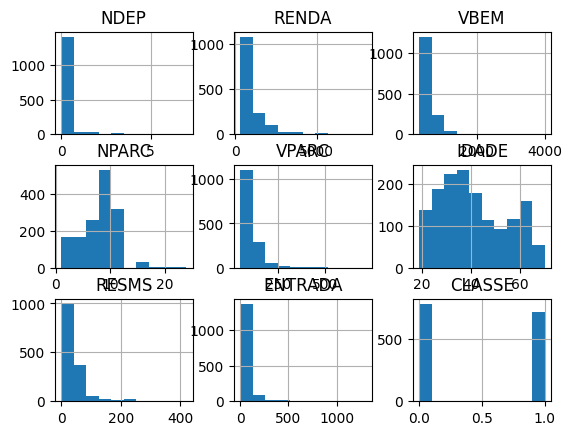

In [14]:
# Split the dataset into features (X) and the target variable (y)
X = dataset.drop('CLASSE', axis=1)
y = dataset['CLASSE']

# Split the data into a training set and a testing set (e.g., 70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

dataset.hist()




In [7]:
import matplotlib.pyplot as plt
ClassAIndices=dataset.where(y==0)
ClassAIndices=ClassAIndices[0].tolist()
ClassBIndices=dataset.where(y==1)
ClassBIndices=ClassBIndices[0].tolist()
 
XclassA=X[ClassAIndices,:]
XclassB=X[ClassBIndices,:]
yclassA=y[ClassAIndices]
yclassB=y[ClassBIndices]

plt.scatter(XclassA[:,0],XclassA[:,1], color='blue', marker='x', label='Class A')
plt.scatter(XclassB[:,0],XclassB[:,1], color='red', marker='o', label='Class B') 
plt.xlabel('X1 feature') 
plt.ylabel('X2 feature') 
plt.legend()
plt.savefig('finalFigure.png')
plt.show()     


KeyError: 0